# Implementation of k-NN
10/15/2023

In [1]:
import random
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve
from sklearn.linear_model import LogisticRegressionCV
import matplotlib.pyplot as plt
%matplotlib notebook

from simulate_data import SimDF

In [2]:
def plot3d():
    fig = plt.figure(figsize=(16,8))
    ax = fig.add_subplot(111, projection='3d')

    # Split the data by class labels
    class_0 = X[y == 0]
    class_1 = X[y == 1]

    # Plot class 0 in blue and class 1 in red
    ax.scatter(class_0[:, 0], class_0[:, 1], class_0[:, 2], c='b', label='Class 0')
    ax.scatter(class_1[:, 0], class_1[:, 1], class_1[:, 2], c='r', label='Class 1')

    # Set labels for the axes
    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')
    ax.set_zlabel('Feature 3')
    ax.legend()

    plt.show()

def plot_roc_curve(y_test, y_score):
    fpr, tpr, thresholds = roc_curve(y_test, y_score)

    # Compute AUC
    auc = roc_auc_score(y_test, y_score)

    # Plot ROC curve
    plt.figure(figsize=(10, 8))
    plt.plot(fpr, tpr, color='darkorange', label=f'ROC curve (AUC = {auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', linestyle='--')  # Diagonal line for a random classifier
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.grid(True)
    plt.show()

In [21]:
class kNN():
    def __init__(self, k, scoring="accuracy_score"):
        self.k = k
        self.scoring = scoring
    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train
        return
    
    def predict(self, X_test):            
        y_pred = []
        for x_new in X_test:
            y_pred.append(self._predict(x_new))
        y_pred = np.asarray(y_pred)
        return y_pred
    
    def predict_proba(self, X_test):
        y_score = []
        for x_new in X_test:
            y_score.append([1-self._predict_proba(x_new), self._predict_proba(x_new)])
        y_score = np.asarray(y_score)
        return y_score

    def __dist__(self, x1, x2):
        return np.sqrt(np.sum((x1-x2)**2))
    
    def _predict(self, x_new):
        distances = []
        for x, _y in zip(self.X_train, self.y_train):
            distances.append((self.__dist__(x, x_new), _y))
        distances.sort(key=lambda x: x[0], reverse=False)
        predictions = [x[1] for x in distances[:self.k]]
        y_pred = np.ceil(np.mean(predictions))
        return y_pred
    

    def _predict_proba(self, x_new):
        distances = []
        for x, _y in zip(self.X_train, self.y_train):
            distances.append((self.__dist__(x, x_new), _y))
        distances.sort(key=lambda x: x[0])
        predictions = [x[1] for x in distances[:self.k]]
        self.y_pred_proba = np.mean(predictions)
        return self.y_pred_proba
    
    def score(self, X_test, y_test):
        y_pred = self.predict(X_test)
        return eval(self.scoring)(y_true=y_test, y_pred=y_pred)

# Simulate Data for Classification

In [4]:
simulated_data = pd.read_csv("simulated-data-10000x20.csv")
print(simulated_data.shape)
print(simulated_data.columns)
simulated_data

(10000, 22)
Index(['id', 'X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10',
       'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'y'],
      dtype='object')


,id,X0,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,y
0,0.0,-0.207946,1.459434,1.484271,-0.399990,0.424863,0.507319,-0.554120,1.268525,-0.799408,-2.485932,1.683523,0.474102,0.592133,-0.786975,-0.116222,0.478732,-1.491594,-0.441518,-0.281767,0.568501,0.0
1,1.0,1.024683,-0.081111,-0.309066,-0.654915,0.131623,1.398070,-0.439740,1.360018,0.128366,1.109546,0.377048,-0.154800,-1.596571,-1.251182,-0.996522,0.689648,0.337882,-0.612446,-0.599821,-1.300040,1.0
2,2.0,0.574095,-1.189296,0.968196,0.894418,0.915655,-1.445858,-0.544124,-0.770906,0.148604,1.264230,0.167991,-1.190523,-0.587145,-0.952255,1.207558,0.460698,-1.134205,-0.356479,-0.346848,-1.024090,1.0
3,3.0,-0.623568,1.266885,1.291193,0.948331,0.182868,0.536442,0.706680,0.609338,0.358424,-0.785755,-0.845450,-1.402136,-0.354213,0.260827,-2.282004,-0.077731,-0.352174,0.475721,-0.389016,-0.860515,1.0
4,4.0,0.323608,-0.788043,-1.799870,-0.545807,0.286997,-0.187276,-1.720501,1.386995,0.917284,1.715152,-1.088359,-0.458450,0.283802,1.507950,2.221357,-0.935602,1.610107,-0.417628,1.161221,-0.510346,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9995.0,-1.034498,0.554894,-0.508474,0.166423,-0.088216,-1.145737,-0.502884,0.478624,-0.035249,0.149391,0.077342,0.034545,0.872291,0.183781,-0.929194,0.424158,0.525917,0.039299,1.783880,0.407336,0.0
9996,9996.0,-1.079830,-0.188996,-0.090974,0.729223,-0.581746,0.671217,1.176141,-0.860924,-0.851132,-0.024480,-0.163794,-1.300617,0.289554,0.594456,0.689546,-1.183497,0.825661,1.313432,0.142799,-0.718745,1.0
9997,9997.0,-0.568017,1.120447,0.438408,1.541358,-1.481016,-0.399983,-0.857625,-0.870012,-0.176862,-1.390080,-0.263934,-0.971679,1.886006,-0.094837,-1.247440,-0.673073,-0.209388,1.127162,0.470870,-0.132899,0.0
9998,9998.0,2.004387,1.689429,0.536399,-0.174915,-1.611774,-1.292905,-0.782632,0.972901,0.384448,0.348890,0.475601,0.230248,0.651263,2.121322,-0.262875,-0.027686,0.064919,0.049236,-1.140232,0.384053,0.0


In [30]:
X = simulated_data.copy()
X = simulated_data.sample(n=500)
print(X['y'].value_counts())
y = X.loc[:, 'y']
X = X.loc[:, 'X0':'X19']
print(X.shape, y.shape)

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.2)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

0.0    251
1.0    249
Name: y, dtype: int64
(500, 20) (500,)
(400, 20) (400,) (100, 20) (100,)


# Train model

In [31]:
model = kNN(4, scoring="accuracy_score")
model.fit(X_train.values, y_train.values.reshape(-1,1))
y_pred = model.predict(X_test.values)
y_score = model.predict_proba(X_test.values)[:,1]

In [32]:

lr_model = LogisticRegressionCV()
lr_model.fit(X_train, y_train)
lr_y_pred = lr_model.predict(X_test)
lr_y_score = lr_model.predict_proba(X_test)[:,1]

## Tune k

1 0.71
2 0.72
3 0.69
4 0.65
5 0.6
6 0.59
7 0.57
8 0.57
9 0.56
10 0.55
11 0.55
12 0.55
13 0.55
14 0.55
15 0.55
16 0.54
17 0.54
18 0.54
19 0.54
20 0.54
21 0.54


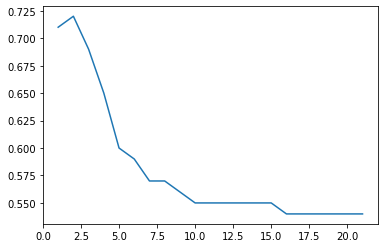

In [33]:
%matplotlib inline
n = len(X_train)
def foo(k):    
    model = kNN(k, scoring="accuracy_score")
    model.fit(X_train.values, y_train.values)
    return model.score(X_test.values, y_test.values.reshape(-1,1))

k_range = list(np.arange(1, int(n*.2)))
vals = []
for k in k_range:
    v = foo(k)
    print(k,v)
    vals.append(v)
    
    # early stopping
    if len(vals) > 20:
        if sum(np.asarray(vals[:10]) - np.asarray(vals[:10])) == 0:
            break

plt.plot(k_range[:len(vals)], vals)

In [34]:
m = np.mean(y_train)
baseline_acc_score = accuracy_score(y_test, y_pred=[1 for _ in range(len(X_test))])
acc = accuracy_score(y_true=y_test, y_pred=y_pred)
auc_score = roc_auc_score(y_test, y_score)
print(f"Accuracy: {acc} (baseline is {baseline_acc_score})\nAUC Score: {auc_score}")

lr_acc = accuracy_score(y_true=y_test, y_pred=lr_y_pred)
lr_auc_score = roc_auc_score(y_test, lr_y_score)
print(f"Accuracy: {lr_acc} (baseline is {baseline_acc_score})\nAUC Score: {lr_auc_score}")

Accuracy: 0.65 (baseline is 0.54)
AUC Score: 0.8454106280193237
Accuracy: 0.75 (baseline is 0.54)
AUC Score: 0.8719806763285024


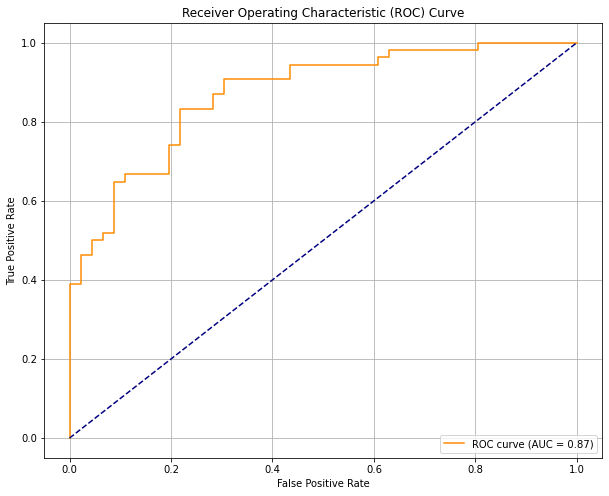

In [35]:
plot_roc_curve(y_test=y_test, y_score=lr_y_score)

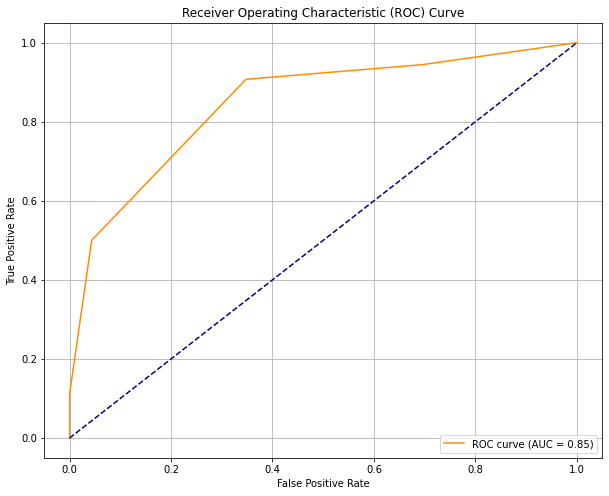

In [36]:
plot_roc_curve(y_test=y_test, y_score=y_score)

In [37]:
%matplotlib notebook
plot3d()

<IPython.core.display.Javascript object>

InvalidIndexError: (slice(None, None, None), 0)